### Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import acquire
import prepare

In [5]:
df = prepare.prep_sales_data()

In [8]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


In [9]:
df.tail(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2017-12-31,50,82.0,913000,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Sunday,426.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  object 
 14  day            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 118.4+ MB

In [11]:
df.describe()

,item_id,sale_amount,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,5.160400,2.384688e+11,2.384688e+11,78224.800000,280.898866
std,14.430878,28.801144,263560.542223,2.872283,2.737764,2.978005e+11,2.978005e+11,16.479087,227.686575
min,1.000000,0.000000,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,78201.000000,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,2.970000,3.367410e+10,3.367410e+10,78217.000000,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,5.195000,7.103651e+10,7.103651e+10,78220.500000,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,7.520000,6.030842e+11,6.030842e+11,78232.000000,402.780000
max,50.000000,231.000000,913000.000000,10.000000,9.640000,8.846237e+11,8.846237e+11,78253.000000,2104.410000


<AxesSubplot:>

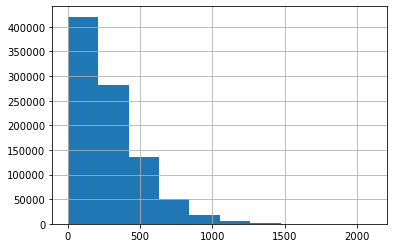

In [10]:
df.sales_total.hist()

In [13]:
train = df.loc[:'2016']
test = df.loc['2017']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_5883/3233208282.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


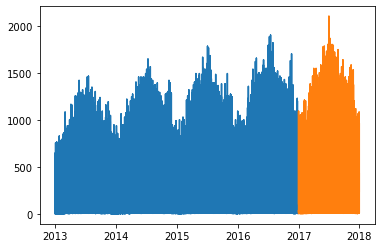

In [16]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

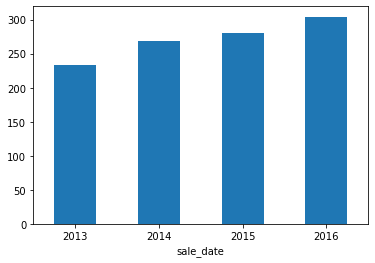

In [35]:
train.groupby(train.index.year).sales_total.mean().plot.bar().tick_params('x', rotation=0)

<AxesSubplot:xlabel='sale_date'>

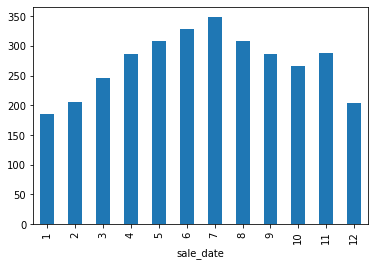

In [36]:
train.groupby(train.index.month).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='day', ylabel='sales_total'>

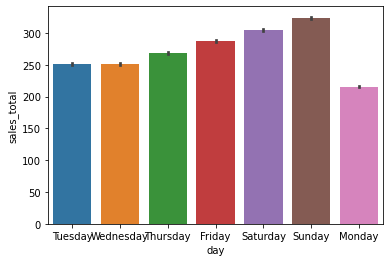

In [42]:
sns.barplot(data=train, y='sales_total', x='day')

<AxesSubplot:xlabel='sale_date'>

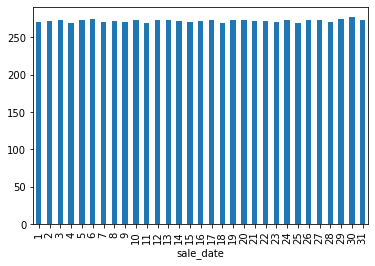

In [40]:
train.groupby(train.index.day).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='sale_date'>

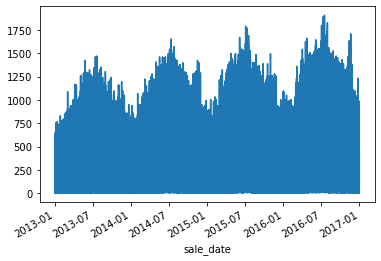

In [43]:
train.sales_total.plot()

In [44]:
y = train.sales_total

<AxesSubplot:xlabel='sale_date'>

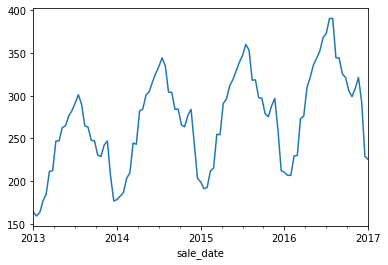

In [45]:
y.resample('2W').mean().plot()

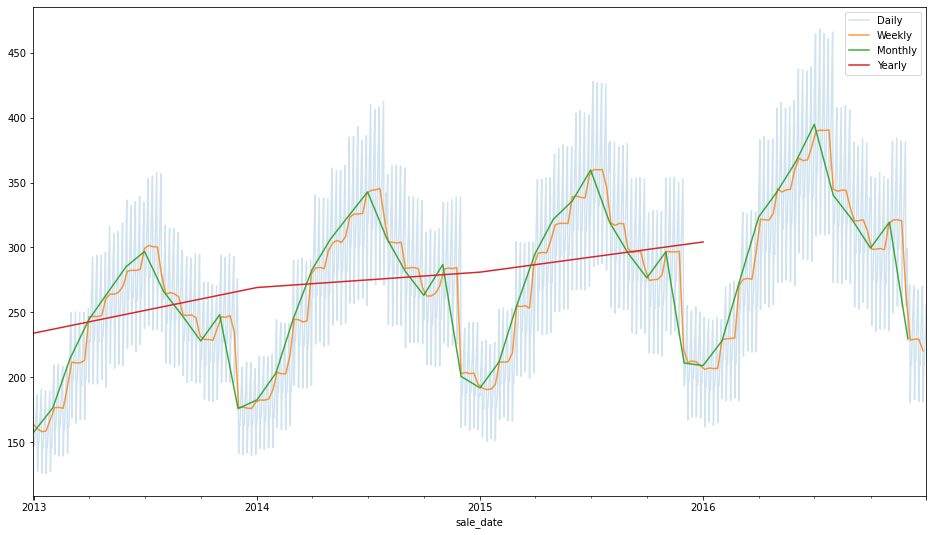

In [60]:
plt.figure(figsize=[16,9])
y.resample('D').mean().plot(alpha=0.2, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sale_date'>

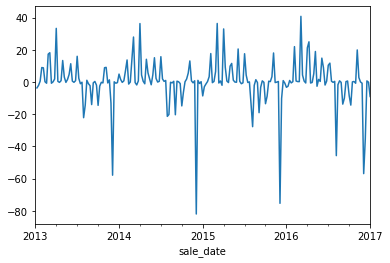

In [49]:
y.resample('W').mean().diff().plot()

(516.0, 563.0)


[Text(0.5, 1.0, 'Sales Total Over Time')]

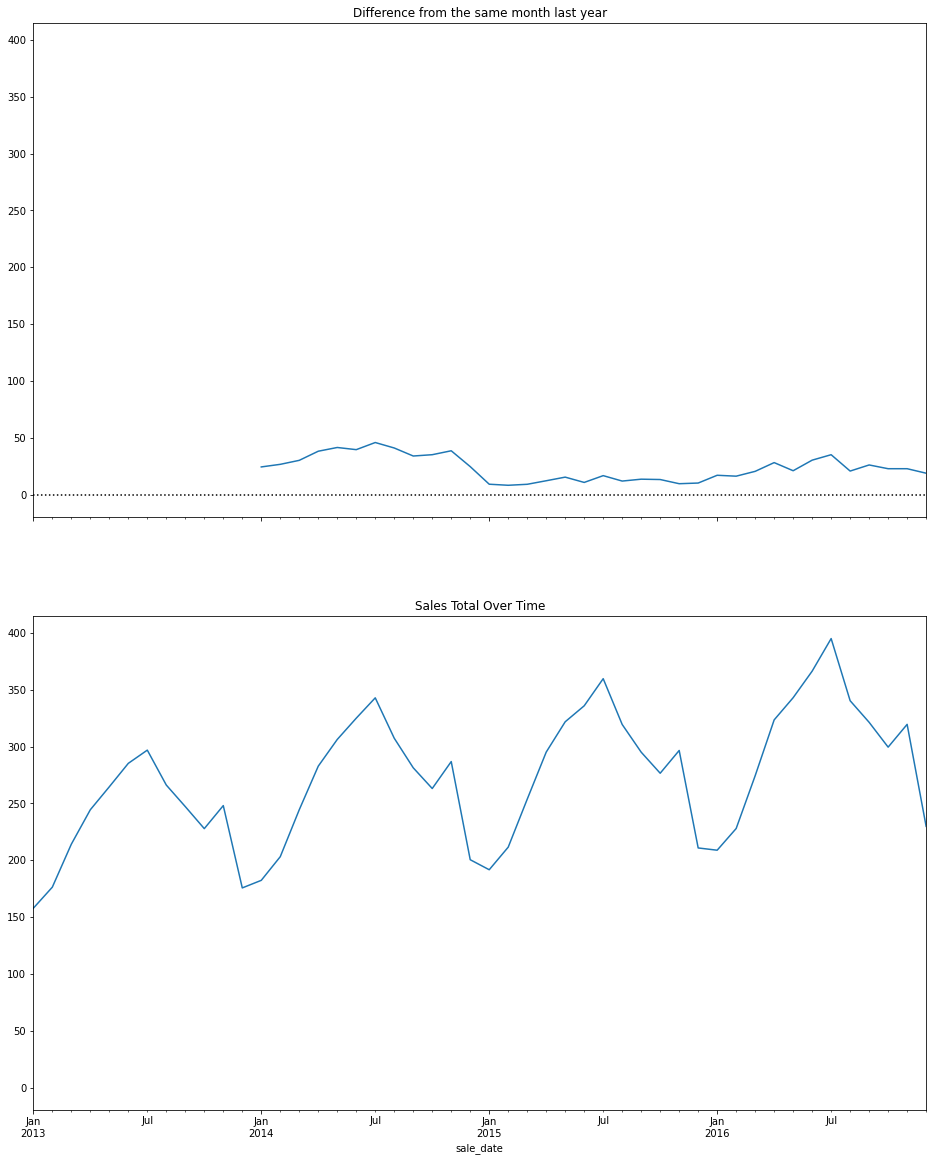

In [50]:
fig, (ax1, ax2) = plt.subplots(2,1, 
                               sharex=True, 
                               sharey=True, 
                               figsize=(16,20))
ax = y.resample('M').mean().diff(12).plot(ax=ax1)
# we will draw a horizontal line here, unpack the xlim with *
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
print(ax1.get_xlim())
ax1.set(title='Difference from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Sales Total Over Time')

<AxesSubplot:xlabel='store_id'>

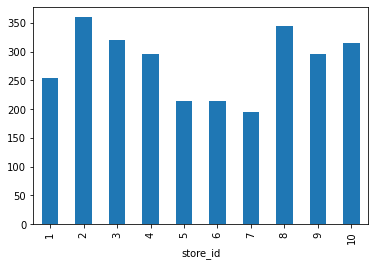

In [59]:
df.groupby('store_id').sales_total.mean().plot.bar()